### 7주차 회귀분석 (2021.3.22)
#### 4.2 선형회귀분석의 기초

In [1]:
X0 = np.arange(10).reshape(5,2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [2]:
import statsmodels.api as sm

In [3]:
X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

In [4]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10,
    coef=True, random_state=1
)
X=sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [5]:
w

array(86.44794301)

#### numpy 를 사용한 선형 회귀분석`

In [6]:
w = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

In [7]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)
y_new = np.dot(X_new, w)

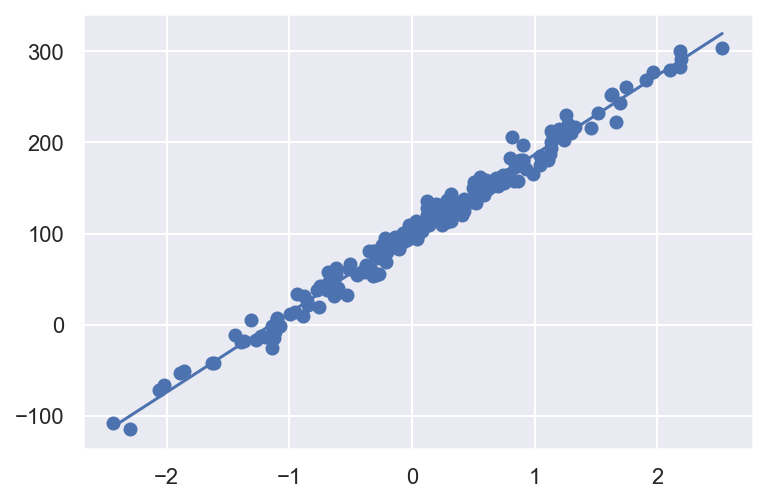

In [8]:
plt.scatter(X0, y)
plt.plot(x_new, y_new)
plt.show()

#### sklearn 사용한 선형 회귀분석

In [9]:
# LinearRegression 객체 생성

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [10]:
model=model.fit(X0, y)

In [11]:
print(model.coef_, model.intercept_)

[[86.96171201]] [99.79150869]


In [12]:
model.predict([[2], [1]])

array([[273.71493272],
       [186.7532207 ]])

#### statsmodel 사용한 선형분석

In [13]:
X0.shape

(200, 1)

In [14]:
df = pd.DataFrame({'x': X0[:,0], 'y':y[:,0]})

In [15]:
model=sm.OLS.from_formula('y~x', data = df)
result=model.fit()

In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          8.17e-182
Time:                        15:46:33   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [17]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

<AxesSubplot:>

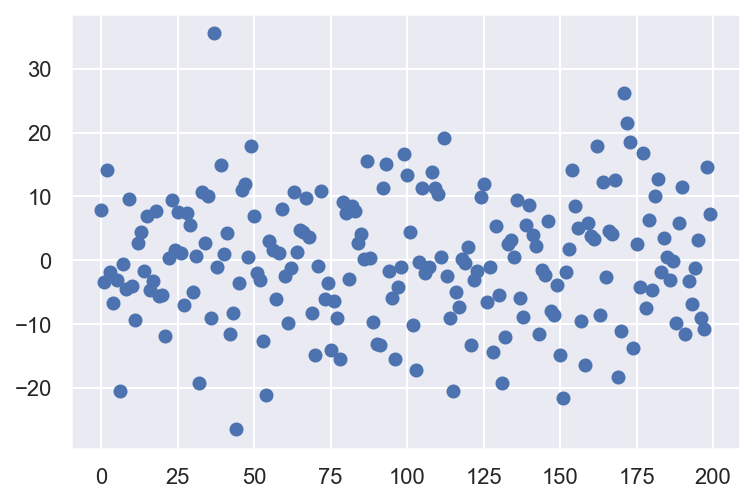

In [18]:
result.resid.plot(style="o")

#### 보스톤 데이터

In [19]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV']=boston.target

In [20]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
# OLS 클래스 객체 생성
model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=boston_df)
# fit 메소드로 모델 추정. 추정 결과느 RegressionResults 클래스 객체로 출력
result = model.fit()

In [22]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        15:46:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

- 조건수가 크면 x의 민감도가 커지고, 따라서 계수행렬이나 상수벡터에 존재하는 오차가 해에 미치는 영향이 커진다. 

In [23]:
A = np.eye(4)
b = np.ones(4)
x = sp.linalg.solve(A, b)
x

array([1., 1., 1., 1.])

In [24]:
x_error = sp.linalg.solve(A + 0.0001 * np.eye(4), b)
x_error

array([0.99990001, 0.99990001, 0.99990001, 0.99990001])

In [25]:
A = sp.linalg.hilbert(4)
A

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.2       , 0.16666667, 0.14285714]])

In [26]:
np.linalg.solve(A, b)

array([  -4.,   60., -180.,  140.])

In [27]:
np.linalg.solve(A + 0.0001 * np.eye(4), b)

array([ -0.58897672,  21.1225671 , -85.75912499,  78.45650825])

In [28]:
# 조건수가 크면 회귀분석을 사용한 예측값도 오차가 커진다.

In [34]:
boston_df.describe().loc['std']

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
Name: std, dtype: float64

In [36]:
# 스케일링
# statsmodels에서 scale() 명령
feature_names = list(boston.feature_names)
feature_names.remove('CHAS')
feature_names = ["scale({})".format(name) for name in feature_names] + ["CHAS"]

In [39]:
model3 = sm.OLS.from_formula("MEDV ~ " +"+".join(feature_names), data = boston_df)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        15:53:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.